# Notes:

- Circulant matrix
- A convolution is a linear time invariant system

#### Raghavendra parts
1. Convolution
2. Sift/Corner Dtectors, 3d reconstruction
3. Deep Learning CNNs and Transformers
- One Assignment and Quiz

Q1) 1D CONV
A) Random input of length 100K or more (whatever your laptop can take)
B) Random filters of length 3 to 25 or more (whatever your laptop can take)
1) A naive for-loop implementation of  filter applied on input
2) Matrix multiplication implementations
(i) where the input is the column vector, 
(ii) where the filter is the column vector

Compare run times for filters of all sizes. Use tictoc. Time includes the time needed to setup matrices. And any reshape/fold operations required.  If you are using numpy for anything besides matrix multiplication, you may want to do that in python without numpy and see how results change (this part is bonus).

Q2) 2D CONV
A) Your Favourite Image, RGB
2) Sobel Horizontal Filter, replicated for all channels

1) A naive for loop implementation 
2) An im2col implementation using only numpy (no other library)
3) An im2col implementation in C using python (bonus)


Convolution:
$$y(x) = \sum^{\infty}_{m=n} h(m \cdot n)$$

In [94]:
# import cv2 as cv
# import open3d as o3d
import numpy as np
import PIL as pil
import skimage as ski
# import sklearn as skl
# import scipy as sci
import matplotlib.pyplot as plt
from ticktock import tick


In [95]:
def function(x):
  if x == 1:
    return SyntaxError
  else:
    return x

In [97]:
def naive_1d_conv(a_size, k_size): # this is the naive implementation with for loops
  clock = tick()
  kernel = np.random.randint(low=0, high=10, size=k_size)
  a = np.random.randint(low=0, high=256, size=a_size)
  b = []
  for i in range(a_size - k_size + 1):
    b.append(np.sum(a[i:i+k_size] * kernel))
  b = np.array(b).reshape(a_size - k_size + 1,)
  return clock.tock()

In [98]:
from scipy.linalg import circulant

def matrix_1d_conv(a_size, k_size): # this is the method where the input is the row vector
  if k_size % 2 == 0:
    raise ValueError('Kernel size must be odd')
  clock = tick()
  kernel = np.random.randint(low=0, high=10, size=k_size)
  a = np.random.randint(low=0, high=256, size=a_size)
  ker_mat_row = np.concatenate((kernel, np.zeros(a_size-k_size)), axis=0)
  ker_mat = np.array(circulant(ker_mat_row)).T[0:(a_size - (k_size - 1))]
  b = ker_mat @ a
  # np.zeros(size=(a_size - (kernel.shape[0] // 2 + 1, a_size))
  return clock.tock()

In [99]:
def matrix_1d_conv_alt(a_size, k_size): # this is the method where the kernel is the row vector
  clock = tick()
  kernel = np.random.randint(low=0, high=10, size=k_size)
  a = np.random.randint(low=0, high=256, size=a_size)
  ker_mat = []
  for i in range(a_size-k_size+1):
    ker_mat.append([a[i: i + k_size]])
  
  
  b = ker_mat @ kernel
  # np.zeros(size=(a_size - (kernel.shape[0] // 2 + 1, a_size))
  return clock.tock()

⏱️ [C:\Users\Hrsh Venket\AppData\Local\Temp\ipykernel_13820\916264250.py:11-17] 231ms292us count=208
⏱️ [C:\Users\Hrsh Venket\AppData\Local\Temp\ipykernel_13820\1943481341.py:6-17] 1s521ms count=306
⏱️ [C:\Users\Hrsh Venket\AppData\Local\Temp\ipykernel_13820\1810792437.py:6-13] 254ms770us count=645
⏱️ [C:\Users\Hrsh Venket\AppData\Local\Temp\ipykernel_13820\1802991740.py:4-14] 11ms913us count=51
⏱️ [C:\Users\Hrsh Venket\AppData\Local\Temp\ipykernel_13820\2161556068.py:2-9] 29ms763us count=340
⏱️ [C:\Users\Hrsh Venket\AppData\Local\Temp\ipykernel_13820\1918113836.py:2-9] 1ms225us count=3
⏱️ [C:\Users\Hrsh Venket\AppData\Local\Temp\ipykernel_13820\2819944082.py:4-14] 12ms351us count=144
⏱️ [C:\Users\Hrsh Venket\AppData\Local\Temp\ipykernel_13820\1660526442.py:4-14] 275us500ns count=1
⏱️ [C:\Users\Hrsh Venket\AppData\Local\Temp\ipykernel_13820\893760208.py:2-12] 15ms36us count=49
⏱️ [C:\Users\Hrsh Venket\AppData\Local\Temp\ipykernel_13820\183875303.py:2-12] 13ms218us count=166
⏱️ [C:\User

⏱️ [C:\Users\Hrsh Venket\AppData\Local\Temp\ipykernel_13820\916264250.py:11-17] 231ms292us count=208
⏱️ [C:\Users\Hrsh Venket\AppData\Local\Temp\ipykernel_13820\1943481341.py:6-17] 1s521ms count=306
⏱️ [C:\Users\Hrsh Venket\AppData\Local\Temp\ipykernel_13820\1810792437.py:6-13] 254ms770us count=645
⏱️ [C:\Users\Hrsh Venket\AppData\Local\Temp\ipykernel_13820\1802991740.py:4-14] 11ms913us count=51
⏱️ [C:\Users\Hrsh Venket\AppData\Local\Temp\ipykernel_13820\2161556068.py:2-9] 29ms763us count=340
⏱️ [C:\Users\Hrsh Venket\AppData\Local\Temp\ipykernel_13820\1918113836.py:2-9] 1ms225us count=3
⏱️ [C:\Users\Hrsh Venket\AppData\Local\Temp\ipykernel_13820\2819944082.py:4-14] 12ms351us count=144
⏱️ [C:\Users\Hrsh Venket\AppData\Local\Temp\ipykernel_13820\1660526442.py:4-14] 275us500ns count=1
⏱️ [C:\Users\Hrsh Venket\AppData\Local\Temp\ipykernel_13820\893760208.py:2-12] 15ms36us count=49
⏱️ [C:\Users\Hrsh Venket\AppData\Local\Temp\ipykernel_13820\183875303.py:2-12] 13ms97us count=169
⏱️ [C:\Users

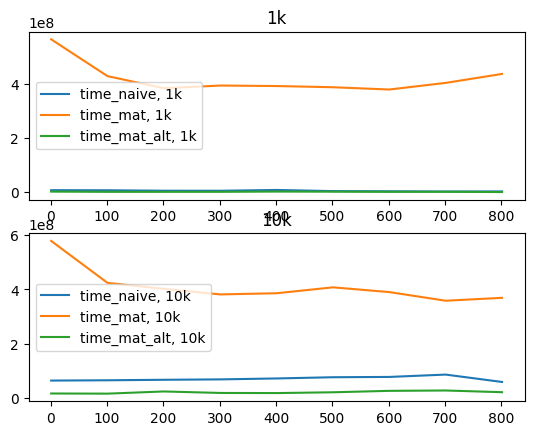

In [105]:
input_1k = 1000
input_10k = 10000

time_naive1 = []
time_mat1 = []
time_mat_alt1 = []
time_naive2 = []
time_mat2 = []
time_mat_alt2 = []
k_sizes = []
for i in range(1, 901, 100): #kernel sizes upto 99,
  time_naive1.append(naive_1d_conv(input_1k, i))
  time_mat1.append(matrix_1d_conv(input_10k, i))
  time_mat_alt1.append(matrix_1d_conv_alt(input_1k, i))
  time_naive2.append(naive_1d_conv(input_10k, i))
  time_mat2.append(matrix_1d_conv(input_10k, i))
  time_mat_alt2.append(matrix_1d_conv_alt(input_10k, i)) 
  k_sizes.append(i)


fig, axs = plt.subplots(2)

# Plot the data for 1k
axs[0].plot(k_sizes, time_naive1, label='time_naive, 1k')
axs[0].plot(k_sizes, time_mat1, label='time_mat, 1k')
axs[0].plot(k_sizes, time_mat_alt1, label='time_mat_alt, 1k')
axs[0].legend()
axs[0].set_title('1k')

# Plot the data for 10k
axs[1].plot(k_sizes, time_naive2, label='time_naive, 10k')
axs[1].plot(k_sizes, time_mat2, label='time_mat, 10k')
axs[1].plot(k_sizes, time_mat_alt2, label='time_mat_alt, 10k')
axs[1].legend()
axs[1].set_title('10k')

# Display the plot
plt.show()

In [234]:
def naive_3d_conv(img, kernel):
    clock = tick()
    out = np.zeros(shape=(img.shape[0] - kernel.shape[0] + 1, img.shape[1] - kernel.shape[1] + 1, img.shape[2] - kernel.shape[2] + 1))
    for i in range(out.shape[0]):
        for j in range(out.shape[1]):
            for k in range(out.shape[2]):
                out[i, j, k] = np.sum(img[i:i+kernel.shape[0], j:j+kernel.shape[1], k:k+kernel.shape[2]] * kernel)
    return out, clock.tock()


In [235]:
def im2col_3d_conv(img, kernel):
  clock = tick()
  ker_mat = []
  for i in range(img.shape[0] - kernel.shape[0] + 1):
    for j in range(img.shape[1] - kernel.shape[1] + 1):
      for k in range(img.shape[2] - kernel.shape[2] + 1):
        ker_mat.append(img[i: i + kernel.shape[0], j: j + kernel.shape[1], k: k + kernel.shape[2]])
  kernel_siz = kernel.shape[0] * kernel.shape[1] * kernel.shape[2]
  num_slides = (img.shape[0] - kernel.shape[0] + 1) * (img.shape[1] - kernel.shape[1] + 1) * (img.shape[2] - kernel.shape[2] + 1)
  ker_mat = np.array(ker_mat).reshape(num_slides, kernel_siz).T
  out = (kernel.flatten() @ ker_mat).reshape(img.shape[0] - kernel.shape[0] + 1, img.shape[1] - kernel.shape[1] + 1, img.shape[2] - kernel.shape[2] + 1)
  return out, clock.tock()
  

⏱️ [C:\Users\Hrsh Venket\AppData\Local\Temp\ipykernel_13820\916264250.py:11-17] 231ms292us count=208
⏱️ [C:\Users\Hrsh Venket\AppData\Local\Temp\ipykernel_13820\1943481341.py:6-17] 1s521ms count=306
⏱️ [C:\Users\Hrsh Venket\AppData\Local\Temp\ipykernel_13820\1810792437.py:6-13] 254ms770us count=645
⏱️ [C:\Users\Hrsh Venket\AppData\Local\Temp\ipykernel_13820\1802991740.py:4-14] 11ms913us count=51
⏱️ [C:\Users\Hrsh Venket\AppData\Local\Temp\ipykernel_13820\2161556068.py:2-9] 29ms763us count=340
⏱️ [C:\Users\Hrsh Venket\AppData\Local\Temp\ipykernel_13820\1918113836.py:2-9] 1ms225us count=3
⏱️ [C:\Users\Hrsh Venket\AppData\Local\Temp\ipykernel_13820\2819944082.py:4-14] 12ms351us count=144
⏱️ [C:\Users\Hrsh Venket\AppData\Local\Temp\ipykernel_13820\1660526442.py:4-14] 275us500ns count=1
⏱️ [C:\Users\Hrsh Venket\AppData\Local\Temp\ipykernel_13820\893760208.py:2-12] 15ms36us count=49
⏱️ [C:\Users\Hrsh Venket\AppData\Local\Temp\ipykernel_13820\183875303.py:2-12] 12ms991us count=184
⏱️ [C:\User

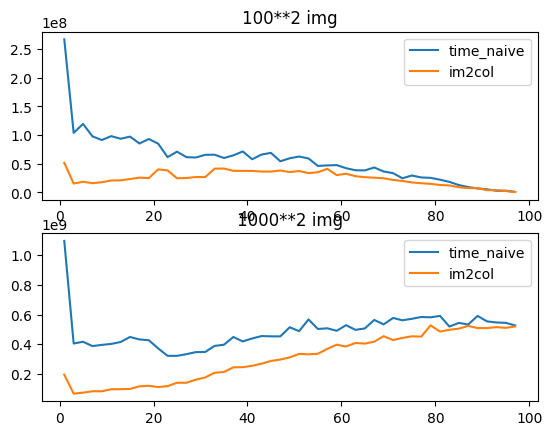

In [251]:
img = np.random.randint(low=0, high=256, size=(3, 100, 100))
img1 = np.random.randint(low=0, high=256, size=(3, 200, 200))

time_naive = []
time_im2col = []
time_naive1 = []
time_im2col1 = []
k_sizes = []
for i in range(1, 99, 2): #kernel sizes upto 99,
  kernel = np.random.randint(low=0, high=10, size=(min(3, i), i, i))
  _,naive_out = naive_3d_conv(img, kernel)                  
  time_naive.append(naive_out)
  _, im2col_out = im2col_3d_conv(img, kernel)
  time_im2col.append(im2col_out)
  
  _, naive_out1 = naive_3d_conv(img1, kernel)
  time_naive1.append(naive_out1)
  _, im2col_out1 = im2col_3d_conv(img1, kernel)
  time_im2col1.append(im2col_out1)
  
  k_sizes.append(i)


fig, axs = plt.subplots(2)

# Plot the data for 100*2
axs[0].plot(k_sizes, time_naive, label='time_naive')
axs[0].plot(k_sizes, time_im2col, label='im2col')
axs[0].legend()
axs[0].set_title('100**2 img')

# Plot the data for 1000**2
axs[1].plot(k_sizes, time_naive1, label='time_naive')
axs[1].plot(k_sizes, time_im2col1, label='im2col')
axs[1].legend()
axs[1].set_title('1000**2 img')

# Display the plot
plt.show()

In [279]:
img =plt.imread("image.jpg")


# Sobel operator for x-direction
sobel_x = np.array([[[ -1, 0, 1],
                     [ -2, 0, 2],
                     [ -1, 0, 1]],

                    [[ -2, 0, 2],
                     [ -3, 0, 3],
                     [ -2, 0, 2]],

                    [[ -1, 0, 1],
                     [ -2, 0, 2],
                     [ -1, 0, 1]]])

# Sobel operator for y-direction
sobel_y = np.array([[[ -1,-2,-1],
                     [  0, 0, 0],
                     [  1, 2, 1]],

                    [[ -2,-3,-2],
                     [  0, 0, 0],
                     [  2, 3, 2]],

                    [[ -1,-2,-1],
                     [  0, 0, 0],
                     [  1, 2, 1]]])

# Sobel operator for z-direction
sobel_z = np.array([[[ -1,-2,-1],
                     [ -2,-3,-2],
                     [ -1,-2,-1]],

                    [[ 0 ,0 ,0 ],
                     [0 ,0 ,0 ],
                     [0 ,0 ,0 ]],

                    [[   1 ,2 ,1 ],
                     [   2 ,3 ,2 ],
                     [   1 ,2 ,1 ]]])

Applying sobel to an image naively

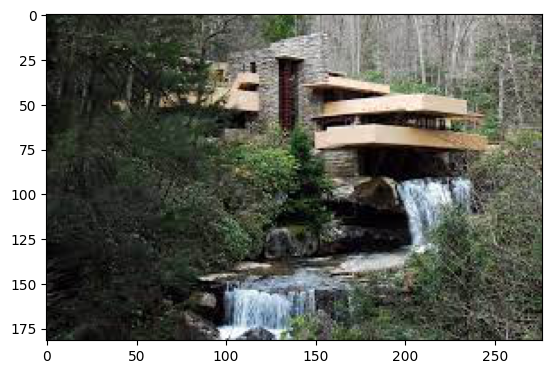

In [298]:
plt.imshow(img)

In [296]:
x_wise, _ = naive_3d_conv(img, sobel_x)
y_wise, _ = naive_3d_conv(img, sobel_y)
z_wise, _ = naive_3d_conv(img, sobel_z)

⏱️ [C:\Users\Hrsh Venket\AppData\Local\Temp\ipykernel_13820\916264250.py:11-17] 231ms292us count=208
⏱️ [C:\Users\Hrsh Venket\AppData\Local\Temp\ipykernel_13820\1943481341.py:6-17] 1s521ms count=306
⏱️ [C:\Users\Hrsh Venket\AppData\Local\Temp\ipykernel_13820\1810792437.py:6-13] 254ms770us count=645
⏱️ [C:\Users\Hrsh Venket\AppData\Local\Temp\ipykernel_13820\1802991740.py:4-14] 11ms913us count=51
⏱️ [C:\Users\Hrsh Venket\AppData\Local\Temp\ipykernel_13820\2161556068.py:2-9] 29ms763us count=340
⏱️ [C:\Users\Hrsh Venket\AppData\Local\Temp\ipykernel_13820\1918113836.py:2-9] 1ms225us count=3
⏱️ [C:\Users\Hrsh Venket\AppData\Local\Temp\ipykernel_13820\2819944082.py:4-14] 12ms351us count=144
⏱️ [C:\Users\Hrsh Venket\AppData\Local\Temp\ipykernel_13820\1660526442.py:4-14] 275us500ns count=1
⏱️ [C:\Users\Hrsh Venket\AppData\Local\Temp\ipykernel_13820\893760208.py:2-12] 15ms36us count=49
⏱️ [C:\Users\Hrsh Venket\AppData\Local\Temp\ipykernel_13820\183875303.py:2-12] 12ms991us count=184
⏱️ [C:\User

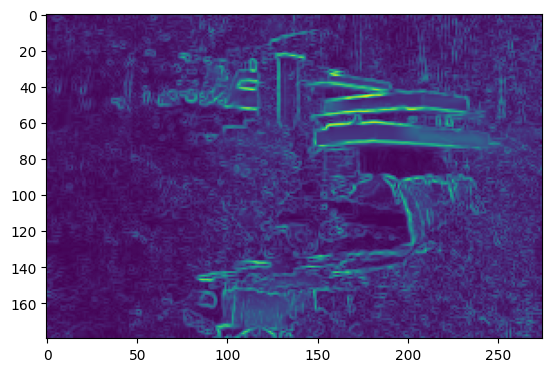

In [297]:
x_wise = x_wise.reshape(180, 275)
y_wise = y_wise.reshape(180, 275)
z_wise = z_wise.reshape(180, 275)

out = np.sqrt(np.square(x_wise) + np.square(y_wise) + np.square(z_wise))

plt.imshow(out)

Applying sobel to an image using im2col

In [266]:
x_wise, _ = im2col_3d_conv(img, sobel_x)
y_wise, _ = im2col_3d_conv(img, sobel_y)
z_wise, _ = im2col_3d_conv(img, sobel_z)


⏱️ [C:\Users\Hrsh Venket\AppData\Local\Temp\ipykernel_13820\916264250.py:11-17] 231ms292us count=208
⏱️ [C:\Users\Hrsh Venket\AppData\Local\Temp\ipykernel_13820\1943481341.py:6-17] 1s521ms count=306
⏱️ [C:\Users\Hrsh Venket\AppData\Local\Temp\ipykernel_13820\1810792437.py:6-13] 254ms770us count=645
⏱️ [C:\Users\Hrsh Venket\AppData\Local\Temp\ipykernel_13820\1802991740.py:4-14] 11ms913us count=51
⏱️ [C:\Users\Hrsh Venket\AppData\Local\Temp\ipykernel_13820\2161556068.py:2-9] 29ms763us count=340
⏱️ [C:\Users\Hrsh Venket\AppData\Local\Temp\ipykernel_13820\1918113836.py:2-9] 1ms225us count=3
⏱️ [C:\Users\Hrsh Venket\AppData\Local\Temp\ipykernel_13820\2819944082.py:4-14] 12ms351us count=144
⏱️ [C:\Users\Hrsh Venket\AppData\Local\Temp\ipykernel_13820\1660526442.py:4-14] 275us500ns count=1
⏱️ [C:\Users\Hrsh Venket\AppData\Local\Temp\ipykernel_13820\893760208.py:2-12] 15ms36us count=49
⏱️ [C:\Users\Hrsh Venket\AppData\Local\Temp\ipykernel_13820\183875303.py:2-12] 12ms991us count=184
⏱️ [C:\User

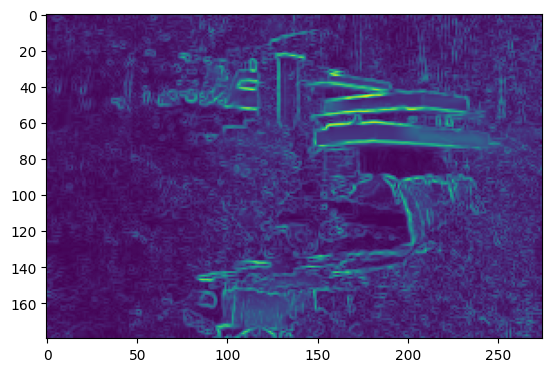

In [295]:
x_wise = x_wise.reshape(180, 275)
y_wise = y_wise.reshape(180, 275)
z_wise = z_wise.reshape(180, 275)

out = np.sqrt(np.square(x_wise) + np.square(y_wise) + np.square(z_wise))

plt.imshow(out)